<a href="https://colab.research.google.com/github/poojaojha-ai/AIHC-5010-Winter-2026/blob/main/AIHC5010_Week_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Jupyter notebook that implements a perceptron and trains the model on an example dataset

Dataset 1: a linearly separable dataset

Dataset 2: a model of the XOR problem

Extra credit: create a simple model that can be trained to solve XOR

In [39]:
# Dataset 1
import numpy as np # Numpy will help us in generating the random data

def generate_linear_data(n_samples=100): # we want to generate 100 sample data points
  # Class 1
  x_1 = np.random.randn(n_samples // 2,2) + np.array([1, 1]) # creates cloud of points around a center; first cloud to be centered at (1,1)
  y_1 = np.zeros(n_samples // 2) # splitting our 100 samples into two

  # Class 2
  x_2 = np.random.randn(n_samples // 2,2) + np.array([5, 5]) # same as before, but moves the second cloud to (5, 5)
  y_2 = np.ones(n_samples // 2)

  # Add the two arrays together - vstack for x (to add the rows together) and concatenate for y (to join two lists together - 0s and 1s)
  x = np.vstack((x_1, x_2))
  y = np.concatenate((y_1, y_2))

  return x, y

x_linear, y_linear = generate_linear_data()



In [40]:
# Print a summary of the dataset
print(f"Total samples: {len(x_linear)}")
print(f"Shape of features (x): {x_linear.shape}")
print(f"Shape of labels (y): {y_linear.shape}")

print("First 5 data points (Class 1):")
# This shows the x, y coordinates and the label (0.0)
for i in range(5):
    print(f"Point {i+1}: Coordinates {x_linear[i]} -> Label: {y_linear[i]}")

print("Last 5 data points (Class 2):")
# This shows the x, y coordinates and the label (1.0)
for i in range(-5, 0):
    print(f"Point {len(x_linear)+i+1}: Coordinates {x_linear[i]} -> Label: {y_linear[i]}")

Total samples: 100
Shape of features (x): (100, 2)
Shape of labels (y): (100,)
First 5 data points (Class 1):
Point 1: Coordinates [0.76260804 2.87200568] -> Label: 0.0
Point 2: Coordinates [0.98055786 0.06740834] -> Label: 0.0
Point 3: Coordinates [-0.29494247  0.8948815 ] -> Label: 0.0
Point 4: Coordinates [-0.99496157 -0.30019284] -> Label: 0.0
Point 5: Coordinates [2.54306765 2.32326381] -> Label: 0.0
Last 5 data points (Class 2):
Point 96: Coordinates [3.56591113 4.80846718] -> Label: 1.0
Point 97: Coordinates [5.057474   2.71719751] -> Label: 1.0
Point 98: Coordinates [4.89805049 5.04213408] -> Label: 1.0
Point 99: Coordinates [5.51458899 6.20463507] -> Label: 1.0
Point 100: Coordinates [5.85135426 4.37963628] -> Label: 1.0


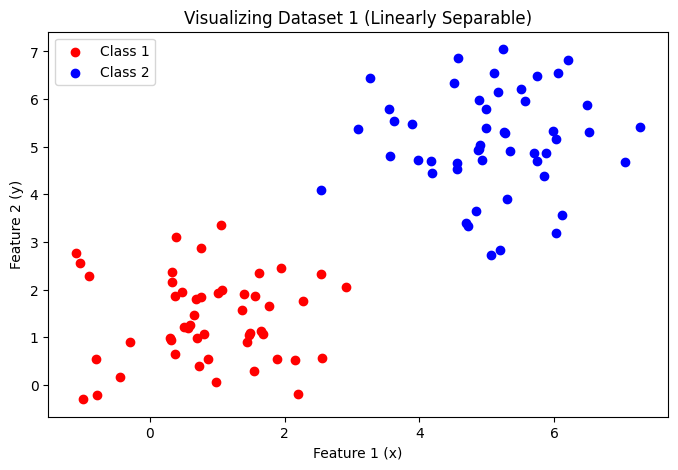

In [41]:
import matplotlib.pyplot as plt

# Plotting the points
plt.figure(figsize=(8, 5))
plt.scatter(x_linear[y_linear == 0, 0], x_linear[y_linear == 0, 1], color='red', label='Class 1')
plt.scatter(x_linear[y_linear == 1, 0], x_linear[y_linear == 1, 1], color='blue', label='Class 2')

plt.title("Visualizing Dataset 1 (Linearly Separable)")
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.legend()
plt.show()

What is XOR?
Exclusive OR (XOR) is non-linearly separable, unlike our previous linearly separable dataset. You cannot draw a single straight line to separate the first and second clusters/classification groups.

In [42]:
# Dataset 2 - XOR

import numpy as np

# 1. Set a random seed for reproducibility
np.random.seed(42)

# 2. Define the number of points per cluster
points_per_cluster = 25

# 3. Create the four clusters
# Cluster 0,0 (Label 0)
c00 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([0, 0])
# Cluster 1,1 (Label 0)
c11 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([1, 1])
# Cluster 0,1 (Label 1)
c01 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([0, 1])
# Cluster 1,0 (Label 1)
c10 = np.random.randn(points_per_cluster, 2) * 0.1 + np.array([1, 0])

# 4. Combine features and create labels
X_xor_100 = np.vstack([c00, c11, c01, c10])
y_xor_100 = np.array([0]*50 + [1]*50)



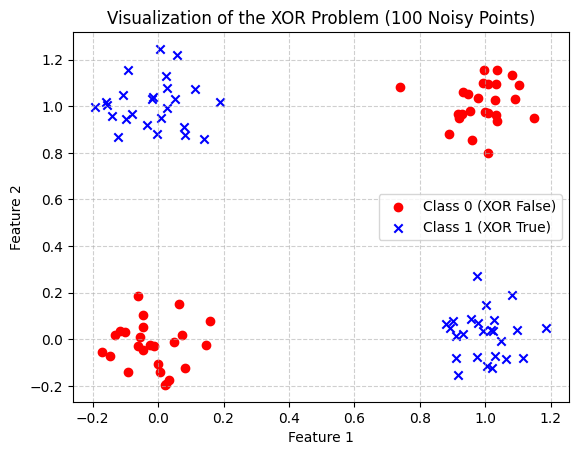

In [43]:
# 5. Plot the data
plt.scatter(X_xor_100[y_xor_100 == 0][:, 0], X_xor_100[y_xor_100 == 0][:, 1],
            color='red', marker='o', label='Class 0 (XOR False)')
plt.scatter(X_xor_100[y_xor_100 == 1][:, 0], X_xor_100[y_xor_100 == 1][:, 1],
            color='blue', marker='x', label='Class 1 (XOR True)')

# 6. Add labels and formatting
plt.title('Visualization of the XOR Problem (100 Noisy Points)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('xor_plot.png')

The plot above visualizes 100 data points generated with Gaussian noise around the four coordinates of the XOR truth table: $(0,0), (1,1)$ for Class 0 (False) and $(0,1), (1,0)$ for Class 1 (True).This dataset is non-linearly separable. Because the classes are arranged in a "checkerboard" pattern, it is impossible to draw a single linear decision boundary (a straight line) that separates the red circles from the blue crosses. This demonstrates the fundamental limitation of a single-layer perceptron, which can only solve problems where classes can be divided by a single line.

In [44]:
# Extra Credit: create a simple model that can be trained to solve XOR
from sklearn.neural_network import MLPClassifier
# scikit-learn MLPClassifier Multi-layer Perceptron classifier
# This model optimizes the log-loss function using LBFGS or stochastic gradient descent
# This supports "hidden layers"

# 1. Shuffle the data - to ensure the model sees a balanced mix of both classes during training process
indices = np.random.permutation(len(X_xor_100)) # creates a random order of numbers from 0 to 99
X_train = X_xor_100[indices]
y_train = y_xor_100[indices]

# 2. Initialize the Multi-Layer Perceptron
# We use one hidden layer with 4 neurons
mlp = MLPClassifier(hidden_layer_sizes=(4,), # Adding one hidden layer with 4 neurons
                    activation='relu', # Rectified Linear Unit (relu) - mathematical function that allows the model to learn non-linear patterns
                    solver='adam', # Optimization algorithm that decides how t oadjust the weights to reduce error
                    max_iter=2000, # 2000 laps through data to find the solution
                    random_state=42) # Random seed for reproducibility

# 3. Train the model - the model looks at inputs, guesses outputs, calculates error, and adjusts itself
mlp.fit(X_train, y_train)

# 4. Check the accuracy
accuracy = mlp.score(X_train, y_train) # This claculates the % points the model calssified correctly
print(f"Training Accuracy: {accuracy * 100}%")

Training Accuracy: 50.0%


In [45]:
# Extra Credit: create a simple model that can be trained to solve XOR
# In the previous section, I was only getting 50% accuracy, which is not great
# I am modifying the XOR code inputs to see if I can get a better result

# 2. Initialize the Multi-Layer Perceptron
# We use two hidden layers with 4 neurons
mlp = MLPClassifier(hidden_layer_sizes=(4, 4), # Adding one hidden layer with 4 neurons
                    activation='relu', # Rectified Linear Unit (relu) - mathematical function that allows the model to learn non-linear patterns
                    solver='adam',
                    learning_rate_init=0.01, # Take bigger steps to learn faster
                    max_iter=3000,
                    random_state=1)

# 3. Train the model - the model looks at inputs, guesses outputs, calculates error, and adjusts itself
mlp.fit(X_train, y_train)

# 4. Check the accuracy
accuracy = mlp.score(X_train, y_train) # This claculates the % points the model calssified correctly
print(f"Training Accuracy: {accuracy * 100}%")


Training Accuracy: 75.0%


In [46]:
# One more try
# The "XOR-Solver" Configuration
mlp = MLPClassifier(
    hidden_layer_sizes=(8, 4),      # More neurons in the first hidden layer
    activation='tanh',              # 'tanh' often works better than 'relu' for XOR
    solver='lbfgs',                 # 'lbfgs' is a superior solver for small datasets (< 200 points)
    max_iter=5000,                  # Plenty of time to converge
    random_state=42
)

mlp.fit(X_train, y_train)
print(f"Final Training Accuracy: {mlp.score(X_train, y_train) * 100}%")

Final Training Accuracy: 100.0%
